In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Load the datasets
df_familia_pessoas_final = pd.read_csv('df_familia_pessoas_final.csv',nrows=100000)
df_familia_pessoas_final = df_familia_pessoas_final.sample(10000)

In [5]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final [['uf_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'id_pessoa', 'cod_sexo_pessoa',
       'idade', 'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'qtd_meses_12_meses_memb', 'peso.pes',
       'qtd_pessoas', 'infancia', 'crianca_adolescente', 'adultos', 'idoso',
       'deficiencia', 'alfabetizado', 'frequenta_escola_publica',
       'frequenta_escola_nunca', 'frequenta_escola_privada',
       'frequenta_escola_nunca_adulto', 'trabalho_semana_adulto',
       'trabalho_semana_idoso', 'trabalho_semana_criança', 'afastado_trabalho',
       'trabalho_principal', 'meses_trabalho']]

y = df_familia_pessoas_final['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (10000, 58)


,uf_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,...,frequenta_escola_publica,frequenta_escola_nunca,frequenta_escola_privada,frequenta_escola_nunca_adulto,trabalho_semana_adulto,trabalho_semana_idoso,trabalho_semana_criança,afastado_trabalho,trabalho_principal,meses_trabalho
99647,35,2,3,2163636,1.0,1.0,5.0,2.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,3.0
89072,26,2,3,2430113,2.0,1.0,5.0,2.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,-1.0
15263,29,2,1,4870790,1.0,1.0,5.0,5.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,12.0
88228,29,2,3,3904682,2.0,1.0,5.0,5.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,5.0
3809,29,2,3,1733033,1.0,1.0,5.0,5.0,1.0,1.0,...,1,0,0,1,0,0,0,0,0,0.0


In [6]:
y.head()

,classe_renda
99647,0.0
89072,2.0
15263,1.0
88228,0.0
3809,0.0


In [7]:
X.columns

Index(['uf_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
       'cod_afast

In [8]:
X.isnull().sum()

,0
uf_ibge,0
estrato,0
classf,0
id_familia,0
cod_local_domic_fam,0
cod_especie_domic_fam,0
qtd_comodos_domic_fam,0
cod_material_piso_fam,0
cod_material_domic_fam,0
cod_agua_canalizada_fam,0


In [9]:
y.describe()

,classe_renda
count,10000.000000
mean,0.623200
std,0.803919
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [10]:
y.value_counts()

,count
classe_renda,
0.0,5825
1.0,2118
2.0,2057


In [11]:
y.isnull().sum()

0

In [12]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
y_train.describe()

,classe_renda
count,8000.000000
mean,0.623250
std,0.803984
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [14]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

In [15]:
y_train_mapped.describe()

,classe_renda
count,8000.000000
mean,0.623250
std,0.803984
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


# Fazendo um pipeline comparando diversos modelos

In [16]:
!pip install xgboost -q

In [17]:
!pip install catboost -q

In [18]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Definição dos Modelos

In [19]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [20]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)

    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 250}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


# 3. Avaliação do Modelo

In [21]:
from sklearn.metrics import accuracy_score, f1_score

In [22]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.67
  Acurácia: 0.75
Modelo: RandomForest
  F1 Score: 0.69
  Acurácia: 0.77
Modelo: XGBoost
  F1 Score: 0.72
  Acurácia: 0.78
Modelo: CatBoost
  F1 Score: 0.71
  Acurácia: 0.78


# 4. Geração de Matriz de Confusão

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

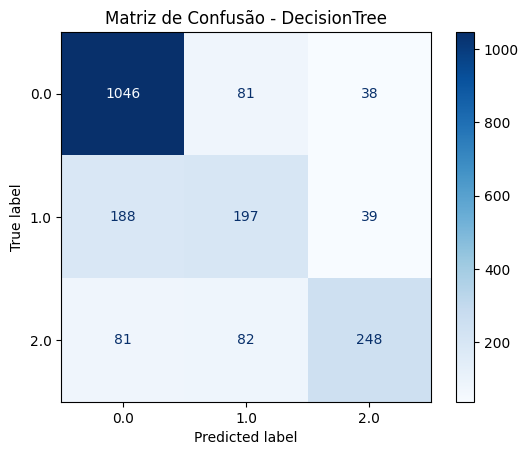

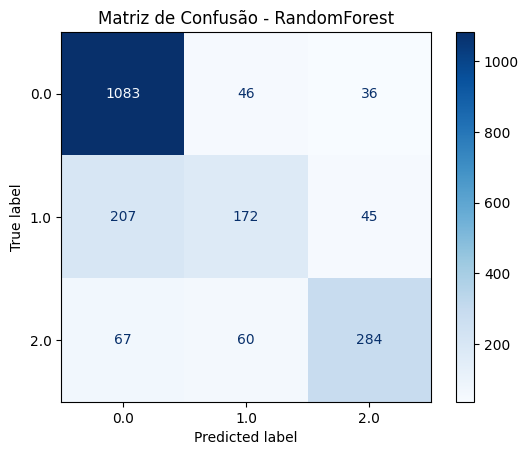

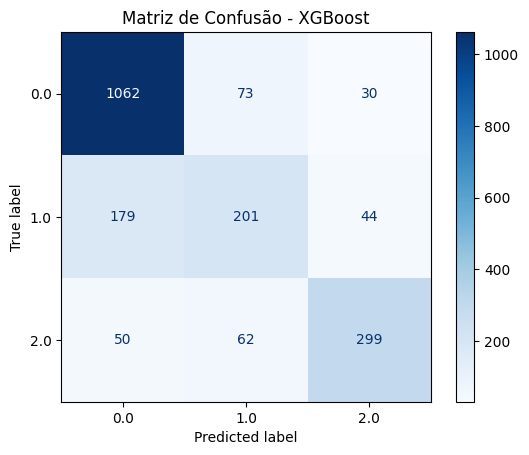

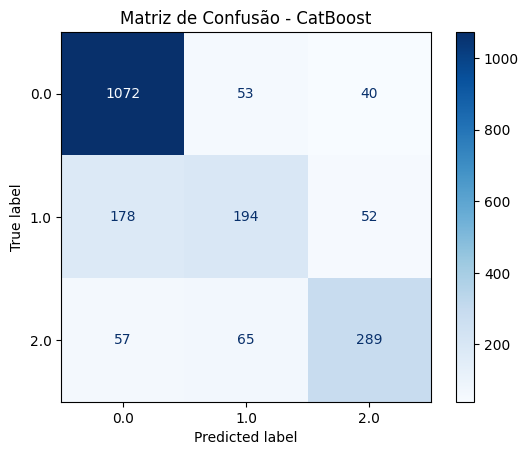

In [24]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [25]:
import numpy as np
from sklearn.inspection import permutation_importance

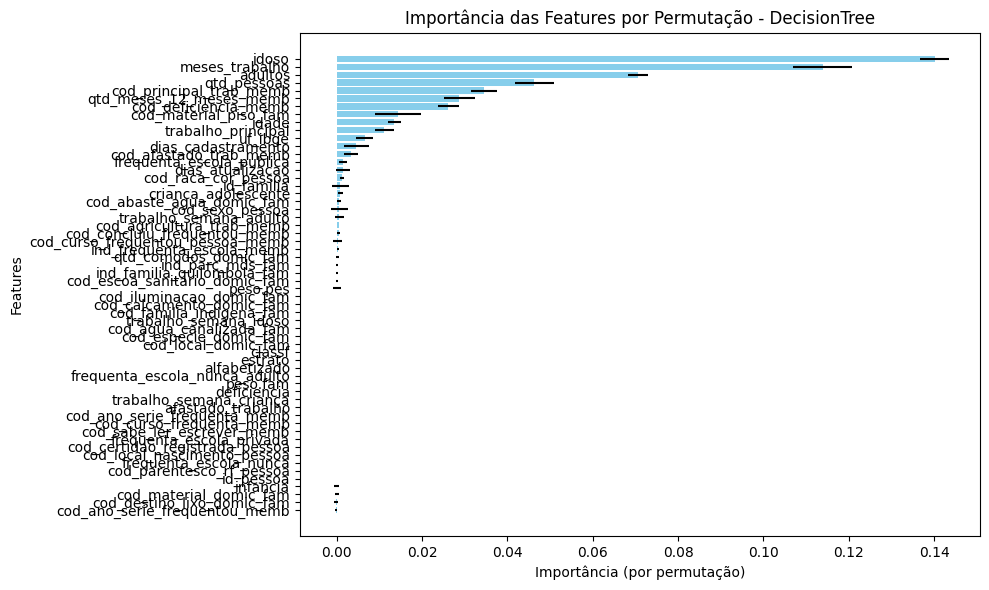

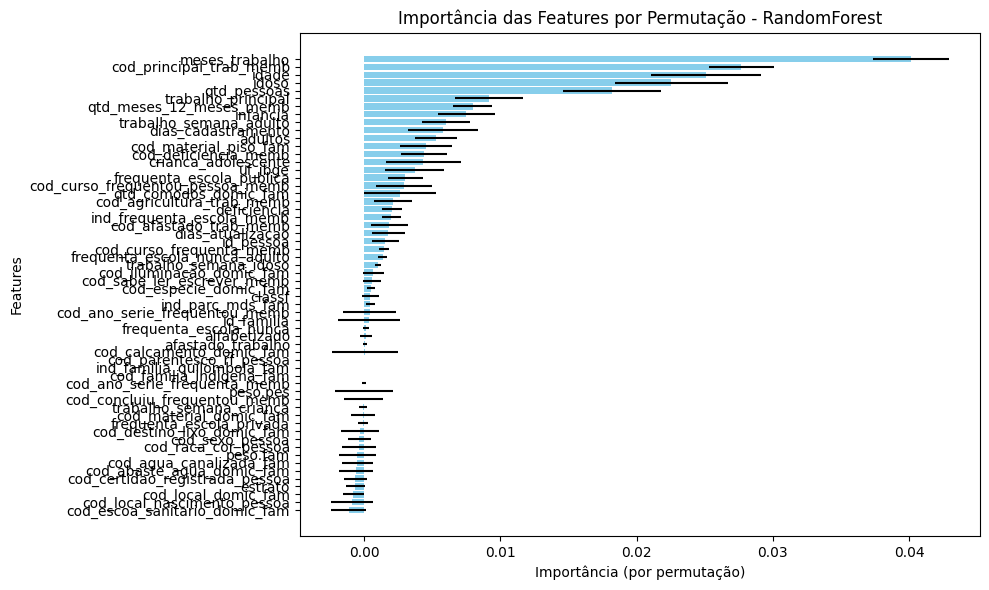

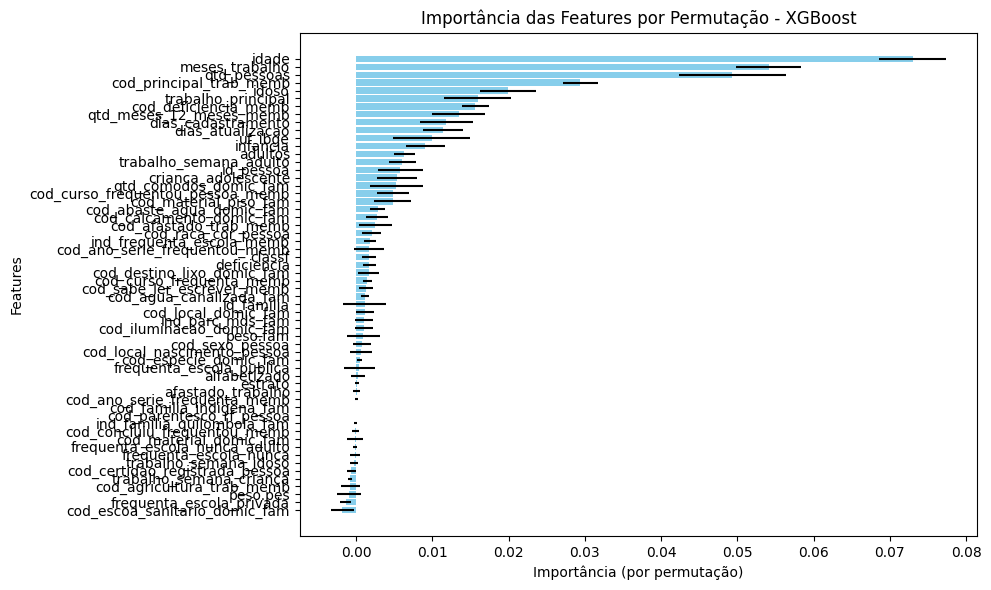

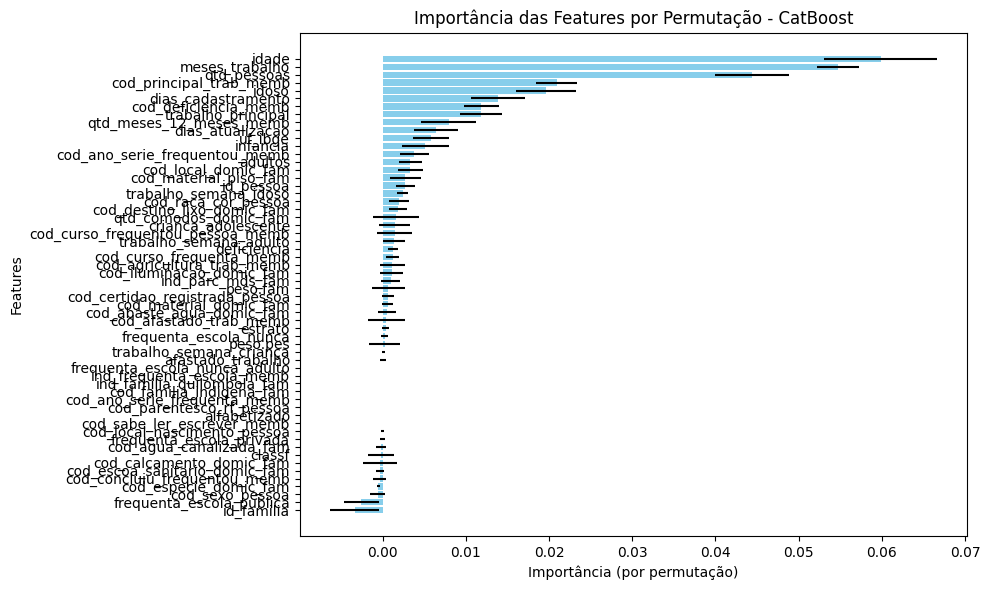

In [26]:
# Importância das features para cada modelo
for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Ordenar importâncias
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    indices = np.argsort(importance_vals)[::-1]

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features por Permutação - {model_name}")
    plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
    plt.yticks(range(len(importance_vals)), X_test.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância (por permutação)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

In [27]:
# Lista para armazenar as 5 principais features de cada modelo
top_features_list = {}

# Obter as 5 features mais importantes de cada modelo
for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Extrair valores de importância e índices
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Obter as 5 principais features e suas importâncias
    top_indices = indices[:5]
    top_features = X_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Armazenar em um DataFrame
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Adicionar ao dicionário
    top_features_list[model_name] = top_features_df

# Exibir as 5 principais features de cada modelo
for model_name, top_features_df in top_features_list.items():
    print(f"\n5 Features mais importantes para o modelo {model_name}:")
    print(top_features_df)


5 Features mais importantes para o modelo DecisionTree:
                   Feature  Importância
0                    idoso      0.14010
1           meses_trabalho      0.11385
2                  adultos      0.07060
3              qtd_pessoas      0.04630
4  cod_principal_trab_memb      0.03450

5 Features mais importantes para o modelo RandomForest:
                   Feature  Importância
0           meses_trabalho      0.04015
1  cod_principal_trab_memb      0.02770
2                    idade      0.02510
3                    idoso      0.02255
4              qtd_pessoas      0.01820

5 Features mais importantes para o modelo XGBoost:
                   Feature  Importância
0                    idade      0.07300
1           meses_trabalho      0.05410
2              qtd_pessoas      0.04930
3  cod_principal_trab_memb      0.02940
4                    idoso      0.01995

5 Features mais importantes para o modelo CatBoost:
                   Feature  Importância
0                    

# Avaliando o balanceamento das classes

In [28]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

In [29]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0.0    0.5825
1.0    0.2118
2.0    0.2057
Name: proportion, dtype: float64


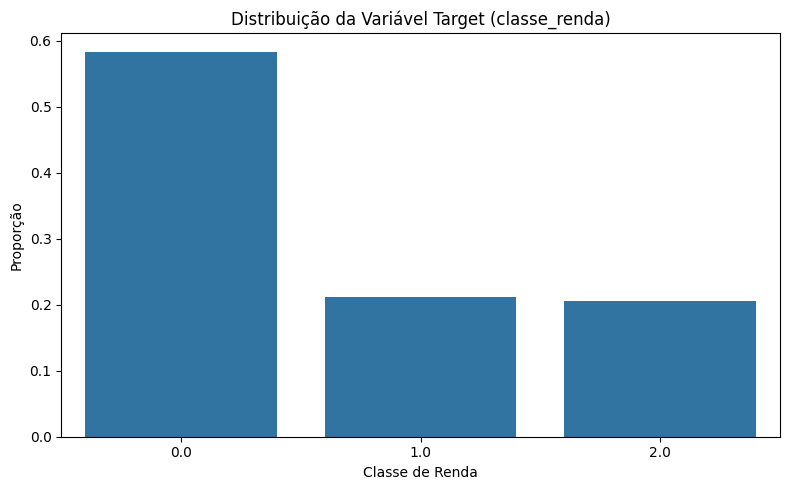

In [30]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = y.value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0.0    5825
1.0    2118
2.0    2057
Name: count, dtype: int64


## Balanceando as classes

In [32]:
pip install imbalanced-learn

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [34]:
df_familia_pessoas_final.classe_renda.value_counts()

,count
classe_renda,
0.0,5825
1.0,2118
2.0,2057


In [35]:
y.value_counts()

,count
classe_renda,
0.0,5825
1.0,2118
2.0,2057


In [36]:
# Suponha que 'y' seja sua variável alvo e '0.0' seja a classe majoritária
n_samples_majority = y.value_counts()[0.0]

# Oversampling da classe '1.0' para 30% da classe majoritária
n_samples_1 = int(0.9 * n_samples_majority)

# Oversampling da classe '2.0' para 40% da classe majoritária
n_samples_2 = int(0.9 * n_samples_majority)

# Undersampling da classe '0.0' para 70% do tamanho original
n_samples_0 = int(1.0 * n_samples_majority)

over = SMOTE(sampling_strategy={1.0: n_samples_1, 2.0: n_samples_2})
under = RandomUnderSampler(sampling_strategy={0.0: n_samples_0})

In [37]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [38]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [39]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0.0    5825
1.0    5242
2.0    5242
Name: count, dtype: int64


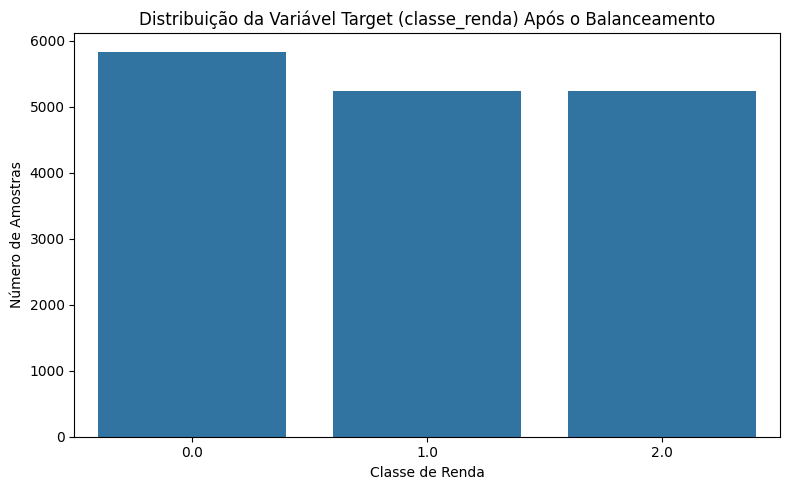

In [40]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Refazendo as análises dos modelos após balanceamento das classes

In [41]:
X_balanced.head()

,uf_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,...,frequenta_escola_publica,frequenta_escola_nunca,frequenta_escola_privada,frequenta_escola_nunca_adulto,trabalho_semana_adulto,trabalho_semana_idoso,trabalho_semana_criança,afastado_trabalho,trabalho_principal,meses_trabalho
4545,15,2,3,1958061,1.0,1.0,4.0,2.0,2.0,2.0,...,1,0,0,1,1,0,0,0,0,12.0
4013,35,2,1,5141094,1.0,1.0,3.0,5.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,-1.0
7569,17,1,3,385145,1.0,1.0,4.0,2.0,6.0,2.0,...,0,0,0,1,1,0,0,0,1,1.0
3326,35,2,3,3759852,2.0,1.0,5.0,5.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,12.0
8333,25,2,2,4214174,1.0,1.0,2.0,2.0,1.0,1.0,...,1,0,0,1,1,0,0,0,1,12.0


In [42]:
print(X_balanced.shape)
print(y_balanced.shape)

(16309, 58)
(16309,)


In [43]:
print(y_balanced.shape)
print(y.shape)  # Verifique se y é igual a y_balanced

(16309,)
(10000,)


In [44]:
# Dividir os dados em treino e teste após balanceamento
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [45]:
# Definir os modelos e os parâmetros
models_balanced = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}



In [46]:
# Parte 3: Criar um dicionário para armazenar os melhores modelos
best_models_balanced = {}

for model_name, model_info in models_balanced.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV usando as features e classes balanceadas
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_balanced_train, y_balanced_train)  # Usando dados balanceados

    # Armazenar o melhor modelo
    best_models_balanced[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name} (usando dados balanceados): {grid_search.best_params_}")



Melhores hiperparâmetros para DecisionTree (usando dados balanceados): {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest (usando dados balanceados): {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost (usando dados balanceados): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost (usando dados balanceados): {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


In [47]:
# Parte 4: Avaliar todos os modelos usando dados balanceados
from sklearn.metrics import f1_score, accuracy_score
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usando dados de teste balanceados

    # Calcular F1 Score
    f1 = f1_score(y_balanced_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_balanced_test, y_pred)

    # Exibir os resultados
    print(f"Modelo (usando dados balanceados): {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo (usando dados balanceados): DecisionTree
  F1 Score: 0.74
  Acurácia: 0.74
Modelo (usando dados balanceados): RandomForest
  F1 Score: 0.84
  Acurácia: 0.84
Modelo (usando dados balanceados): XGBoost
  F1 Score: 0.84
  Acurácia: 0.84
Modelo (usando dados balanceados): CatBoost
  F1 Score: 0.82
  Acurácia: 0.82


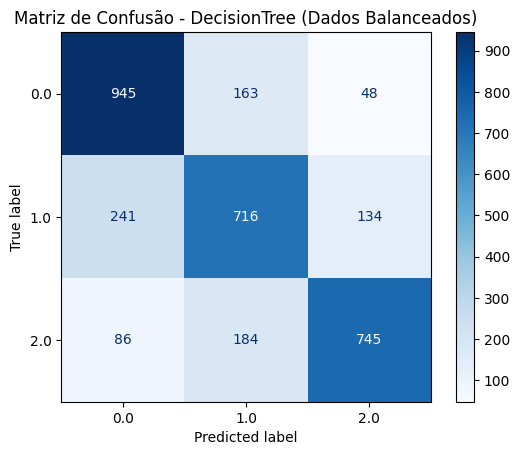

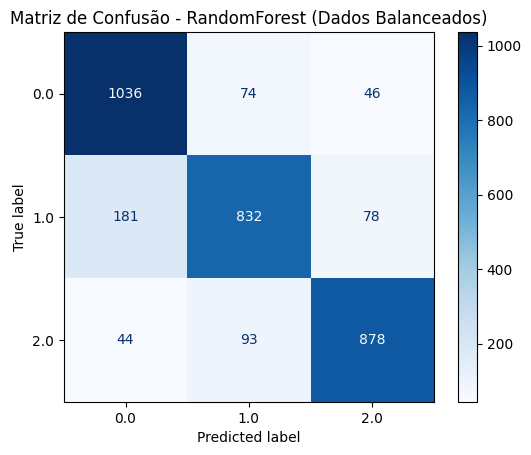

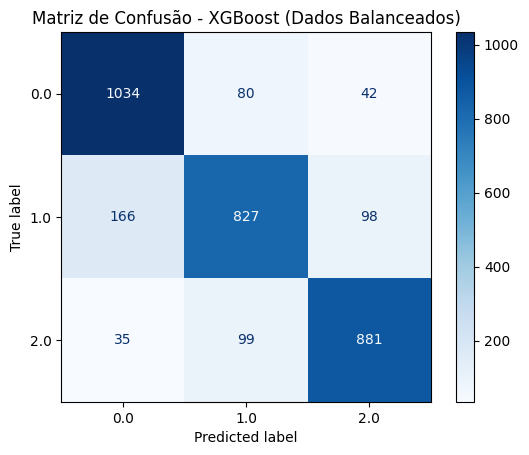

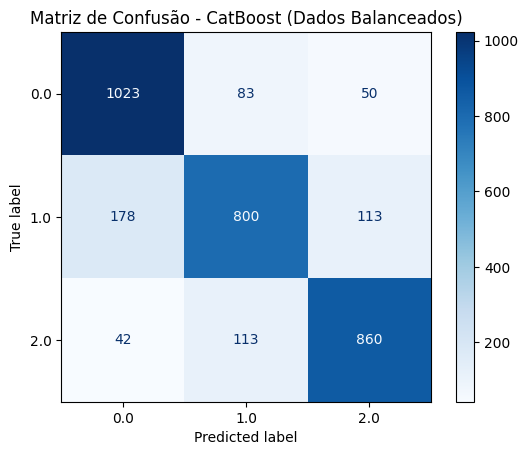

In [48]:
# Parte 5: Gerar matriz de confusão para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usar os dados de teste balanceados

    # Gerar a matriz de confusão
    ConfusionMatrixDisplay.from_estimator(model, X_balanced_test, y_balanced_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name} (Dados Balanceados)')
    plt.show()

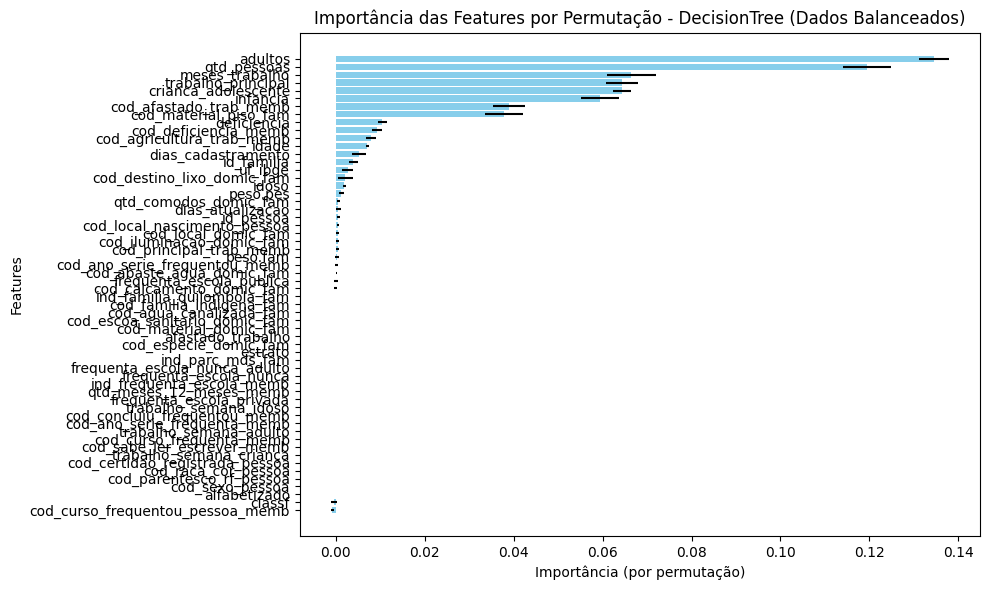

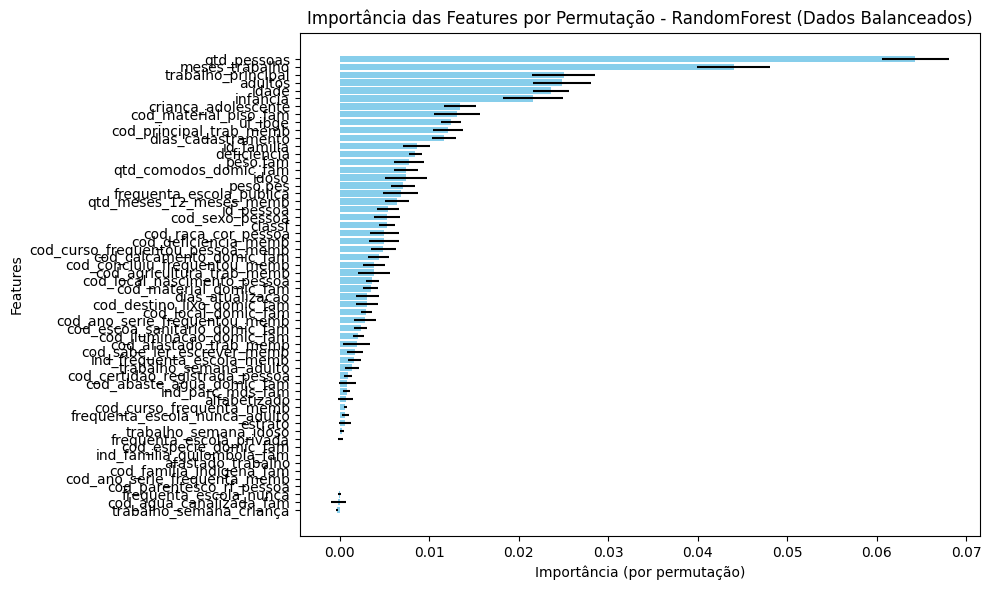

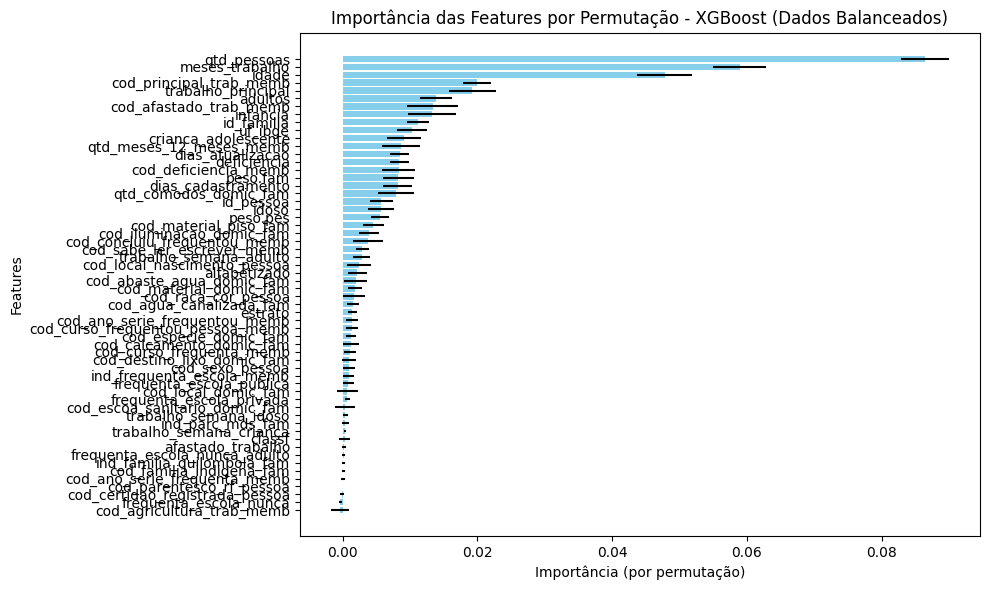

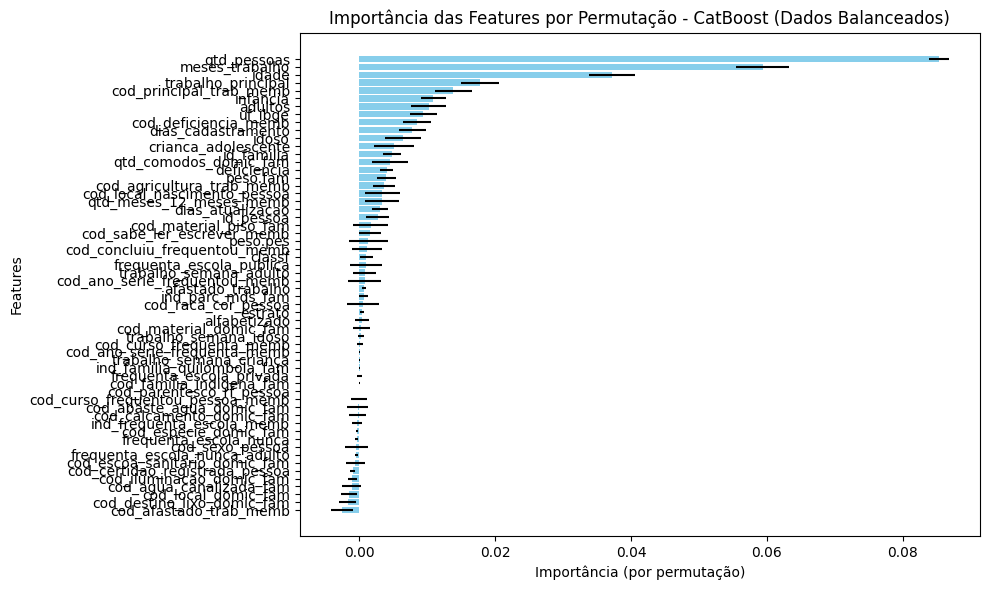

In [49]:
# Parte 6: Importância das features para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Ordenar importâncias
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    indices = np.argsort(importance_vals)[::-1]

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features por Permutação - {model_name} (Dados Balanceados)")
    plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
    plt.yticks(range(len(importance_vals)), X_balanced_test.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância (por permutação)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()



In [50]:
# Parte 7: Lista para armazenar as 5 principais features de cada modelo
top_features_list = {}

# Obter as 5 features mais importantes de cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Extrair valores de importância e índices
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Obter as 5 principais features e suas importâncias
    top_indices = indices[:5]
    top_features = X_balanced_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Armazenar em um DataFrame
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Adicionar ao dicionário
    top_features_list[model_name] = top_features_df

# Exibir as 5 principais features de cada modelo
for model_name, top_features_df in top_features_list.items():
    print(f"\n5 Features mais importantes para o modelo {model_name} (Dados Balanceados):")
    print(top_features_df)



5 Features mais importantes para o modelo DecisionTree (Dados Balanceados):
               Feature  Importância
0              adultos     0.134549
1          qtd_pessoas     0.119528
2       meses_trabalho     0.066493
3   trabalho_principal     0.064378
4  crianca_adolescente     0.064316

5 Features mais importantes para o modelo RandomForest (Dados Balanceados):
              Feature  Importância
0         qtd_pessoas     0.064347
1      meses_trabalho     0.044022
2  trabalho_principal     0.025046
3             adultos     0.024831
4               idade     0.023636

5 Features mais importantes para o modelo XGBoost (Dados Balanceados):
                   Feature  Importância
0              qtd_pessoas     0.086450
1           meses_trabalho     0.058921
2                    idade     0.047762
3  cod_principal_trab_memb     0.019896
4       trabalho_principal     0.019221

5 Features mais importantes para o modelo CatBoost (Dados Balanceados):
                   Feature  Importâ

# Comparando a performance antes e após o balanceamento

In [51]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance

In [52]:
# Lista para armazenar as métricas de desempenho
performance_comparison = []

# Avaliar modelos antes do balanceamento
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score e Acurácia
    f1_before = f1_score(y_test, y_pred, average='macro')
    accuracy_before = accuracy_score(y_test, y_pred)

    # Armazenar os resultados antes do balanceamento
    performance_comparison.append({
        'Modelo': model_name,
        'F1 Score Antes do Balanceamento': f1_before,
        'Acurácia Antes do Balanceamento': accuracy_before,
        'F1 Score Após o Balanceamento': None,  # Inicializa como None
        'Acurácia Após o Balanceamento': None,  # Inicializa como None
    })


In [53]:
# Avaliar modelos após o balanceamento
for model_name, model in best_models_balanced.items():
    y_pred_balanced = model.predict(X_balanced_test)

    # Calcular F1 Score e Acurácia
    f1_balanced = f1_score(y_balanced_test, y_pred_balanced, average='macro')
    accuracy_after = accuracy_score(y_balanced_test, y_pred_balanced)

    # Adicionar os resultados após o balanceamento ao mesmo dicionário
    for entry in performance_comparison:
        if entry['Modelo'] == model_name:
            entry['F1 Score Após o Balanceamento'] = f1_balanced
            entry['Acurácia Após o Balanceamento'] = accuracy_after



In [54]:
# Criar DataFrame para as métricas de desempenho
performance_df = pd.DataFrame(performance_comparison)

# Exibir o DataFrame de desempenho
performance_df.head(10)


,Modelo,F1 Score Antes do Balanceamento,Acurácia Antes do Balanceamento,F1 Score Após o Balanceamento,Acurácia Após o Balanceamento
0,DecisionTree,0.673337,0.7455,0.736826,0.737584
1,RandomForest,0.693610,0.7695,0.841344,0.841815
2,XGBoost,0.718841,0.7810,0.839693,0.840589
3,CatBoost,0.708095,0.7775,0.821157,0.822502


In [55]:
# Obter as 5 features mais importantes antes do balanceamento
top_features_before = {}

for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    top_indices = indices[:5]
    top_features = X_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    top_features_before[model_name] = top_features_df



In [56]:
# Obter as 5 features mais importantes após o balanceamento
top_features_after = {}

for model_name, model in best_models_balanced.items():
    # Calcular a importância das features usando o conjunto de dados balanceado
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Extrair os valores de importância
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Selecionar os 5 índices mais importantes
    top_indices = indices[:5]
    top_features = X_balanced_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Criar DataFrame para armazenar as features e suas importâncias
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Armazenar o DataFrame na lista de modelos
    top_features_after[model_name] = top_features_df




In [57]:
# Criar DataFrame para as features mais importantes antes e após o balanceamento
top_features_before_df = pd.concat(top_features_before, names=['Modelo', 'Índice']).reset_index()
top_features_after_df = pd.concat(top_features_after, names=['Modelo', 'Índice']).reset_index()

In [58]:
top_features_before_df.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,idoso,0.14010
1,DecisionTree,1,meses_trabalho,0.11385
2,DecisionTree,2,adultos,0.07060
3,DecisionTree,3,qtd_pessoas,0.04630
4,DecisionTree,4,cod_principal_trab_memb,0.03450
5,RandomForest,0,meses_trabalho,0.04015
6,RandomForest,1,cod_principal_trab_memb,0.02770
7,RandomForest,2,idade,0.02510
8,RandomForest,3,idoso,0.02255
9,RandomForest,4,qtd_pessoas,0.01820


In [59]:
top_features_after_df.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,adultos,0.134549
1,DecisionTree,1,qtd_pessoas,0.119528
2,DecisionTree,2,meses_trabalho,0.066493
3,DecisionTree,3,trabalho_principal,0.064378
4,DecisionTree,4,crianca_adolescente,0.064316
5,RandomForest,0,qtd_pessoas,0.064347
6,RandomForest,1,meses_trabalho,0.044022
7,RandomForest,2,trabalho_principal,0.025046
8,RandomForest,3,adultos,0.024831
9,RandomForest,4,idade,0.023636


In [60]:
# Combinar em um único dataframe

# Criar um DataFrame vazio para armazenar o resultado
combined_df = pd.DataFrame()

# Iterar sobre os modelos únicos
for modelo in top_features_before_df['Modelo'].unique():
    # Obter as 5 features mais importantes antes e após o balanceamento
    antes = top_features_before_df[top_features_before_df['Modelo'] == modelo].reset_index(drop=True)
    depois = top_features_after_df[top_features_after_df['Modelo'] == modelo].reset_index(drop=True)

    # Adicionar as features antes e depois ao DataFrame combinado
    for i in range(5):  # Para as 5 features mais importantes
        combined_df = pd.concat([combined_df, pd.DataFrame({
            'Modelo': modelo,
            'Feature Antes': antes['Feature'][i],
            'Importância Antes': antes['Importância'][i],
            'Feature Após': depois['Feature'][i],
            'Importância Após': depois['Importância'][i]
        }, index=[0])], ignore_index=True)


In [61]:
 combined_df.head(20)

,Modelo,Feature Antes,Importância Antes,Feature Após,Importância Após
0,DecisionTree,idoso,0.14010,adultos,0.134549
1,DecisionTree,meses_trabalho,0.11385,qtd_pessoas,0.119528
2,DecisionTree,adultos,0.07060,meses_trabalho,0.066493
3,DecisionTree,qtd_pessoas,0.04630,trabalho_principal,0.064378
4,DecisionTree,cod_principal_trab_memb,0.03450,crianca_adolescente,0.064316
5,RandomForest,meses_trabalho,0.04015,qtd_pessoas,0.064347
6,RandomForest,cod_principal_trab_memb,0.02770,meses_trabalho,0.044022
7,RandomForest,idade,0.02510,trabalho_principal,0.025046
8,RandomForest,idoso,0.02255,adultos,0.024831
9,RandomForest,qtd_pessoas,0.01820,idade,0.023636
